In [1]:
"""
Purpose: To investigate why the spine 
extracter is missing some spines

Conclusion: Just had to get rid of 

"""

'\nPurpose: To investigate why the spine \nextracter is missing some spines\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")

In [4]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import proofreading_utils as pru

import preprocessing_vp2 as pre

# -- For the axon classification --

import neuron_searching as ns

import skeleton_utils as sk

import numpy_utils as nu

import networkx_utils as xu

import system_utils as su

INFO - 2021-01-20 18:57:57,513 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-20 18:57:57,514 - settings - Setting database.user to celiib
INFO - 2021-01-20 18:57:57,515 - settings - Setting database.password to newceliipass
INFO - 2021-01-20 18:57:57,524 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-20 18:57:57,525 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-20 18:57:57,539 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-20 18:57:57,810 - settings - Setting enable_python_native_blobs to True


In [5]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-20 18:57:57,897 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-20 18:57:58,183 - settings - Setting enable_python_native_blobs to True


# Importing the Neuron

In [6]:
minnie.Decomposition()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,1,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8309
864691134242673681,0,0.25,30.00,0,0,1,=BLOB=,10252,20204,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9755
864691134252908410,0,0.25,30.00,0,0,1,=BLOB=,10910,22764,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2558
864691134316523453,0,0.25,30.00,0,0,1,=BLOB=,10031,22403,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5114
864691134384033872,0,0.25,30.00,0,0,1,=BLOB=,10015,20509,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8075
864691134391593458,0,0.25,30.00,0,0,1,=BLOB=,11947,25033,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7341
864691134409056935,0,0.25,30.00,0,0,1,=BLOB=,10770,22630,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9198
864691134428609977,0,0.25,30.00,0,0,1,=BLOB=,13062,28555,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.3236
864691134441691943,0,0.25,30.00,0,0,1,=BLOB=,10681,23432,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9167
864691134484023255,0,0.25,30.00,0,0,1,=BLOB=,21063,46992,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2306


In [7]:
segment_id = 864691135575126046

In [63]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [64]:
neuron_obj.n_spines

1261

In [65]:
nviz.plot_spineses(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [85]:
neuron = reload(neuron)
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


In [86]:
neuron_obj.calculate_spines()

query = median_mesh_center > 115 and n_faces_branch>100
smoothness_threshold = 0.1
The median_mesh_center was requested and HAS already been calculated
functions_list = [<function median_mesh_center at 0x7fa453786f28>, <function n_faces_branch at 0x7fa453786ae8>]
segment_name before cgal = L0_0



segment_name before cgal = L0_3



segment_name before cgal = L0_27



segment_name before cgal = L0_42



segment_name before cgal = L0_46



segment_name before cgal = L0_55



segment_name before cgal = L0_65



segment_name before cgal = L0_91



segment_name before cgal = L0_93



segment_name before cgal = L0_94



segment_name before cgal = L0_95



segment_name before cgal = L0_103



segment_name before cgal = L0_174



segment_name before cgal = L0_176



segment_name before cgal = L1_0



segment_name before cgal = L1_1



segment_name before cgal = L1_2



segment_name before cgal = L1_3



segment_name before cgal = L1_4



segment_name before cgal = L1_5



segment_name before cgal = L1_6



segment_name before cgal = L1_7



segment_name before cgal = L1_8



segment_name before cgal = L1_9



segment_name before cgal = L1_10



segment_name before cgal = L1_11



segment_name before cgal = L1_12



segment_name before cgal = L1_13



segment_name before cgal = L1_14



segment_name before cgal = L1_15



segment_name before cgal = L1_16



segment_name before cgal = L1_17



segment_name before cgal = L1_18



segment_name before cgal = L1_19



segment_name before cgal = L1_20



segment_name before cgal = L1_23



segment_name before cgal = L2_0



segment_name before cgal = L2_1



segment_name before cgal = L2_2



segment_name before cgal = L2_3



segment_name before cgal = L2_4



segment_name before cgal = L2_5



segment_name before cgal = L2_6



segment_name before cgal = L2_7



segment_name before cgal = L2_8



segment_name before cgal = L2_9



segment_name before cgal = L2_10



segment_name before cgal = L2_11



segment_name before cgal = L2_12



segment_name before cgal = L3_0



segment_name before cgal = L3_1



segment_name before cgal = L3_2



segment_name before cgal = L3_3



segment_name before cgal = L3_4



segment_name before cgal = L3_5



segment_name before cgal = L3_6



segment_name before cgal = L3_7



segment_name before cgal = L3_8



segment_name before cgal = L3_9



segment_name before cgal = L3_10



segment_name before cgal = L4_0



segment_name before cgal = L4_1



segment_name before cgal = L4_2



segment_name before cgal = L4_3



segment_name before cgal = L4_4



segment_name before cgal = L4_5



segment_name before cgal = L4_6



segment_name before cgal = L5_0


In [87]:
neuron_obj.n_spines

1499

In [88]:
nviz.plot_spines(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [73]:
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh",],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                     return_color_dict=True)


 Working on visualization type: mesh


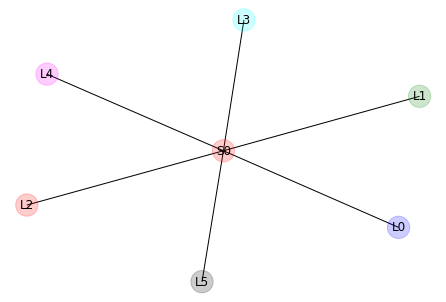

In [74]:
nviz.plot_soma_limb_concept_network(neuron_obj,
                                   node_colors=ret_col)

In [75]:
branch_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [79]:
neuron_obj[0][103].labels

[]

In [77]:
nviz.plot_branch_spines(neuron_obj[0][93])

No limb name was given so using L0 because was the limb in the first key


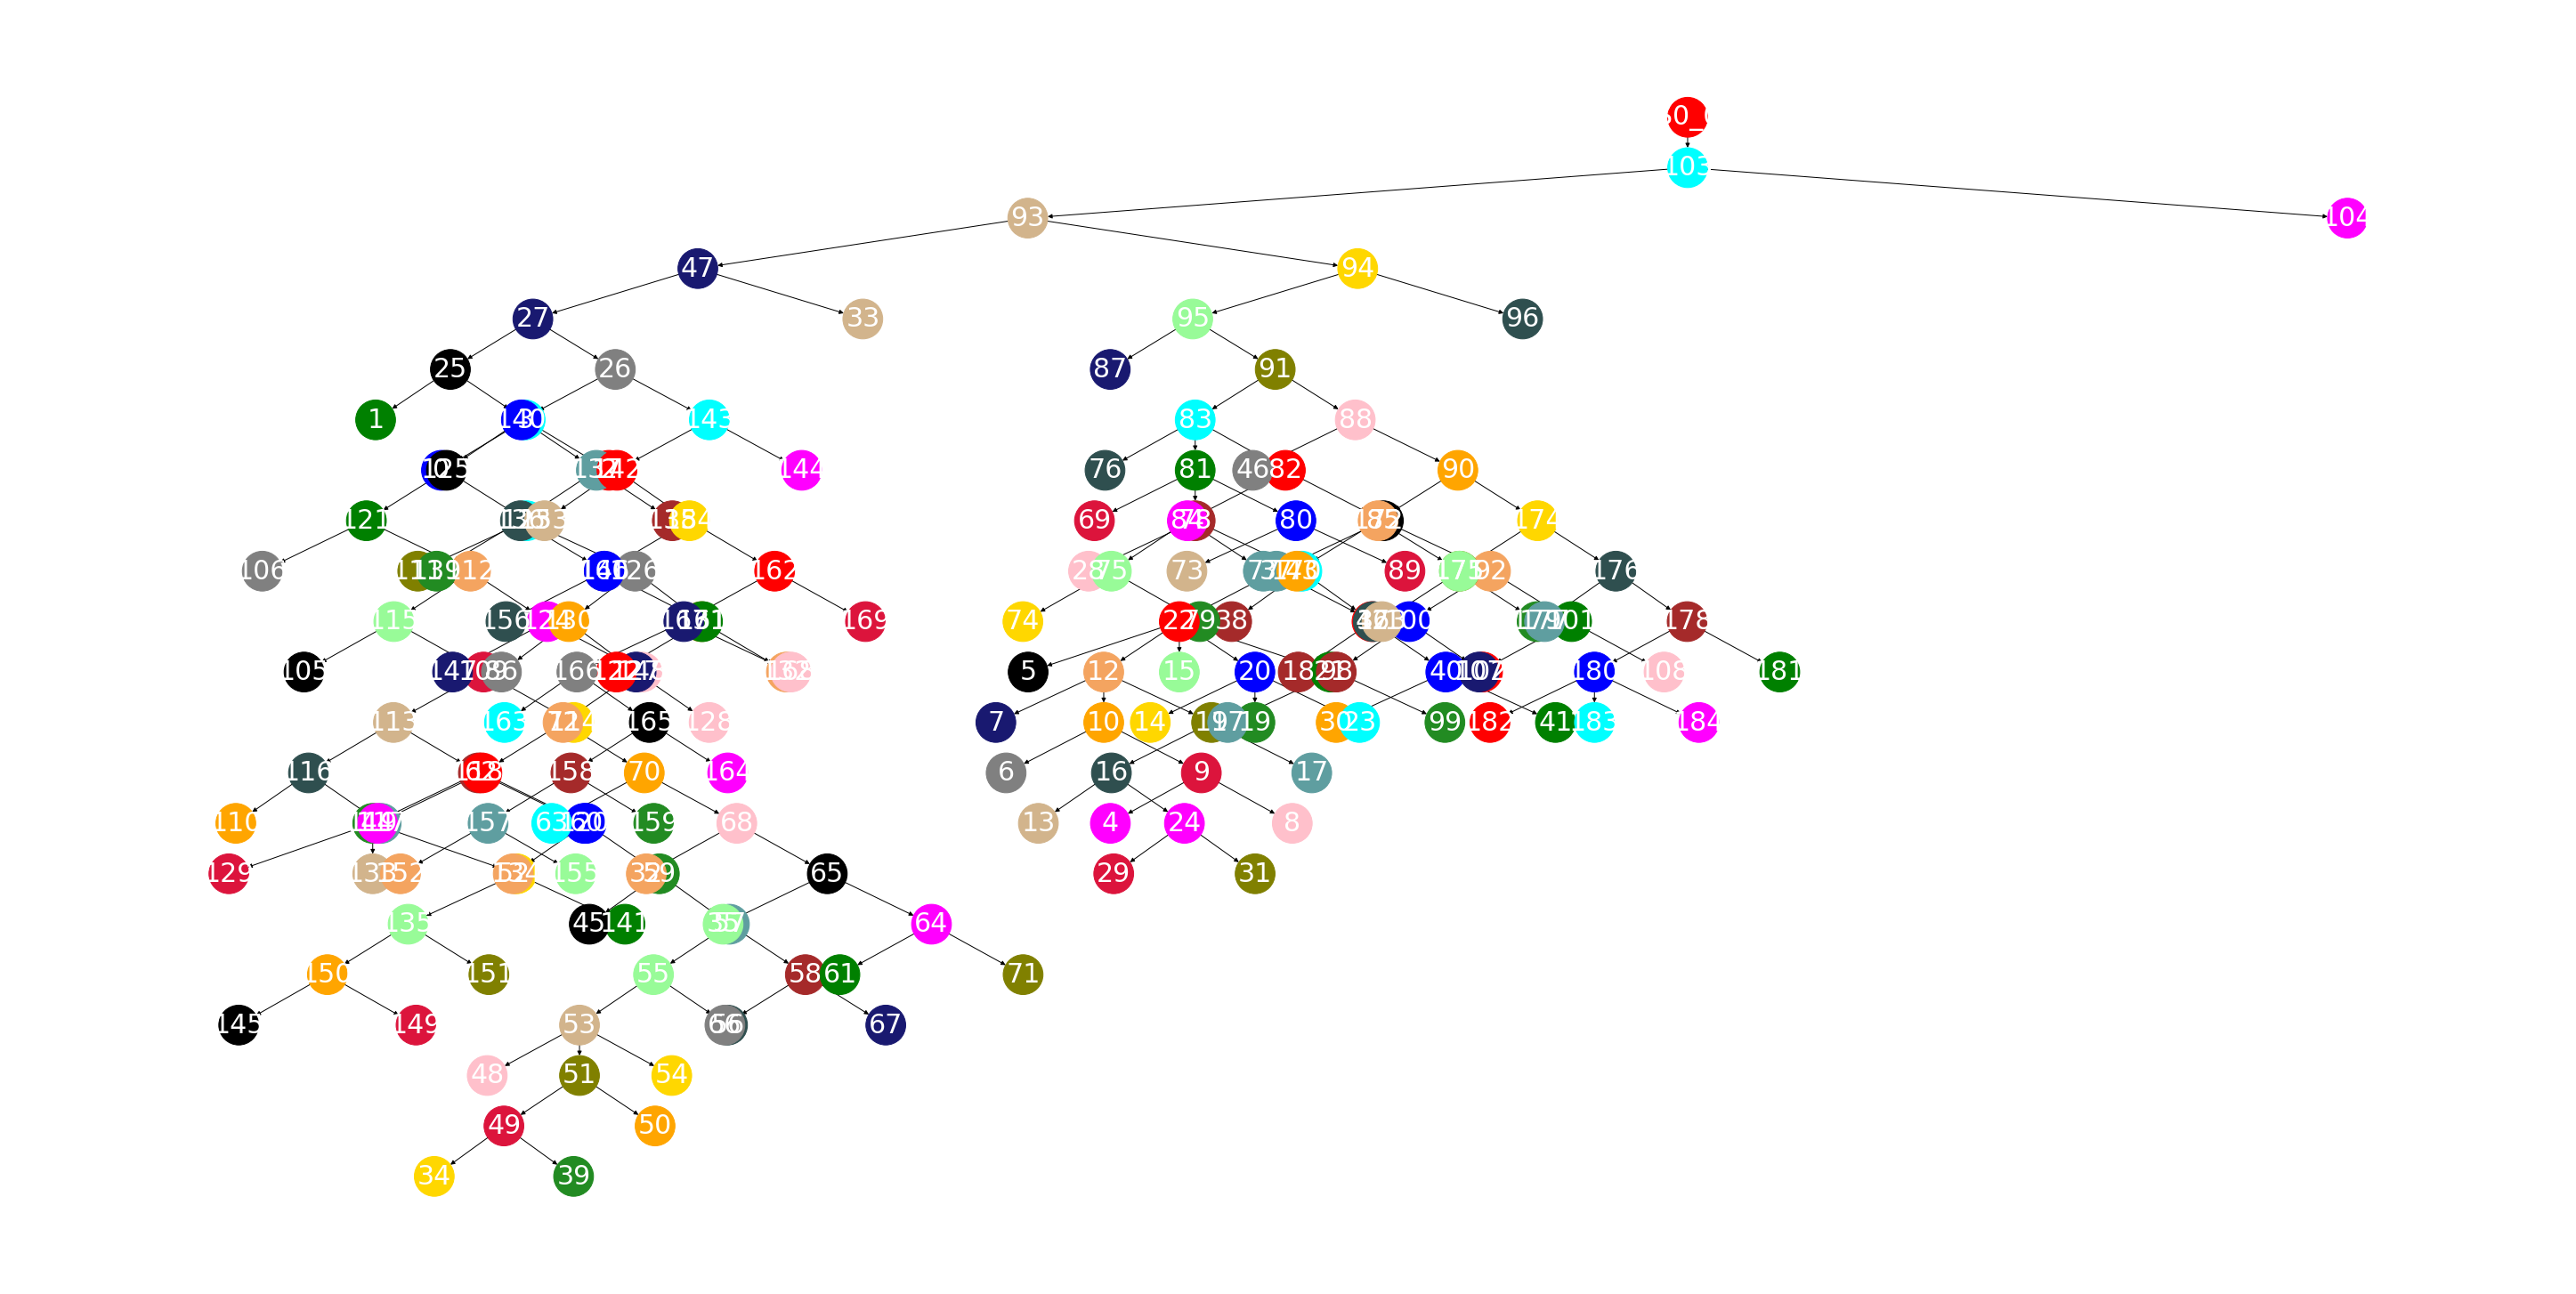

In [76]:
nviz.plot_limb_concept_network_2D(neuron_obj,
                                 node_colors=branch_col)

In [70]:
import classification_utils as clu

In [89]:
clu.axon_classification(neuron_obj)

current_query = (n_spines < 4 and (median_mesh_center < 600) and skeleton_distance_branch <= 25000) or (skeleton_distance_branch > 15000 and (median_mesh_center < 600) and spines_per_skeletal_length < 0.00007)
functions_list = [<function width at 0x7fa453786c80>, <function median_mesh_center at 0x7fa453786f28>, <function n_spines at 0x7fa453786d90>, <function n_faces_branch at 0x7fa453786ae8>, <function skeleton_distance_branch at 0x7fa453786d08>, <function spines_per_skeletal_length at 0x7fa453787268>, <function no_spine_median_mesh_center at 0x7fa4537870d0>]
functions_list = [<function axon_segment at 0x7fa453787ae8>]

Part 1: Axon like branchese 
{'L0': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59, 

({'L0': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
          11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
          22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
          33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
          44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
          55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
          66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
          77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
          88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
          99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
         110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
         121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
         132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
         143., 144.

In [90]:
nviz.plot_axon(neuron_obj)

functions_list = [<function labels_restriction at 0x7fa453787378>]

 Working on visualization type: mesh


In [80]:
import neuron_searching as ns

axon_like_limb_branch_dict = ns.axon_width_like_segments(neuron_obj,
                                                        include_ais=True)

nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh"],
                     limb_branch_dict=axon_like_limb_branch_dict,
                     mesh_color="red",
                      mesh_color_alpha=1,
                     mesh_whole_neuron=True)

current_query = (n_spines < 4 and (median_mesh_center < 600) and skeleton_distance_branch <= 25000) or (skeleton_distance_branch > 15000 and (median_mesh_center < 600) and spines_per_skeletal_length < 0.00007)
functions_list = [<function width at 0x7fa453786c80>, <function median_mesh_center at 0x7fa453786f28>, <function n_spines at 0x7fa453786d90>, <function n_faces_branch at 0x7fa453786ae8>, <function skeleton_distance_branch at 0x7fa453786d08>, <function spines_per_skeletal_length at 0x7fa453787268>, <function no_spine_median_mesh_center at 0x7fa4537870d0>]

 Working on visualization type: mesh


In [83]:
current_functions_list = ["axon_segment"]
final_axon_like_classification = ns.query_neuron(neuron_obj,
                   query="axon_segment==True",
                   function_kwargs=dict(limb_branch_dict =axon_like_limb_branch_dict,
                                        downstream_face_threshold=3000,
                                        width_match_threshold=50,
                                       print_flag=False),
                   functions_list=current_functions_list)

nviz.visualize_neuron(neuron_obj,
                              visualize_type=["mesh"],
                             limb_branch_dict=final_axon_like_classification,
                             mesh_color="red",
                              mesh_color_alpha=1,
                             mesh_whole_neuron=True)

functions_list = [<function axon_segment at 0x7fa453787ae8>]

 Working on visualization type: mesh


In [9]:
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh",],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                     return_color_dict=True)


 Working on visualization type: mesh


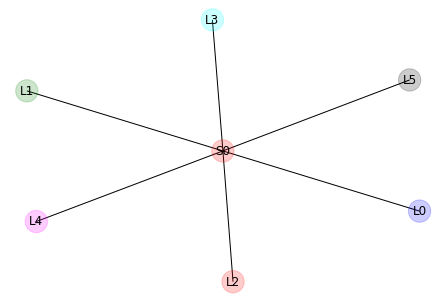

In [10]:
nviz.plot_soma_limb_concept_network(neuron_obj,
                                   node_colors=ret_col)

In [11]:
branch_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L3="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L3 because was the limb in the first key


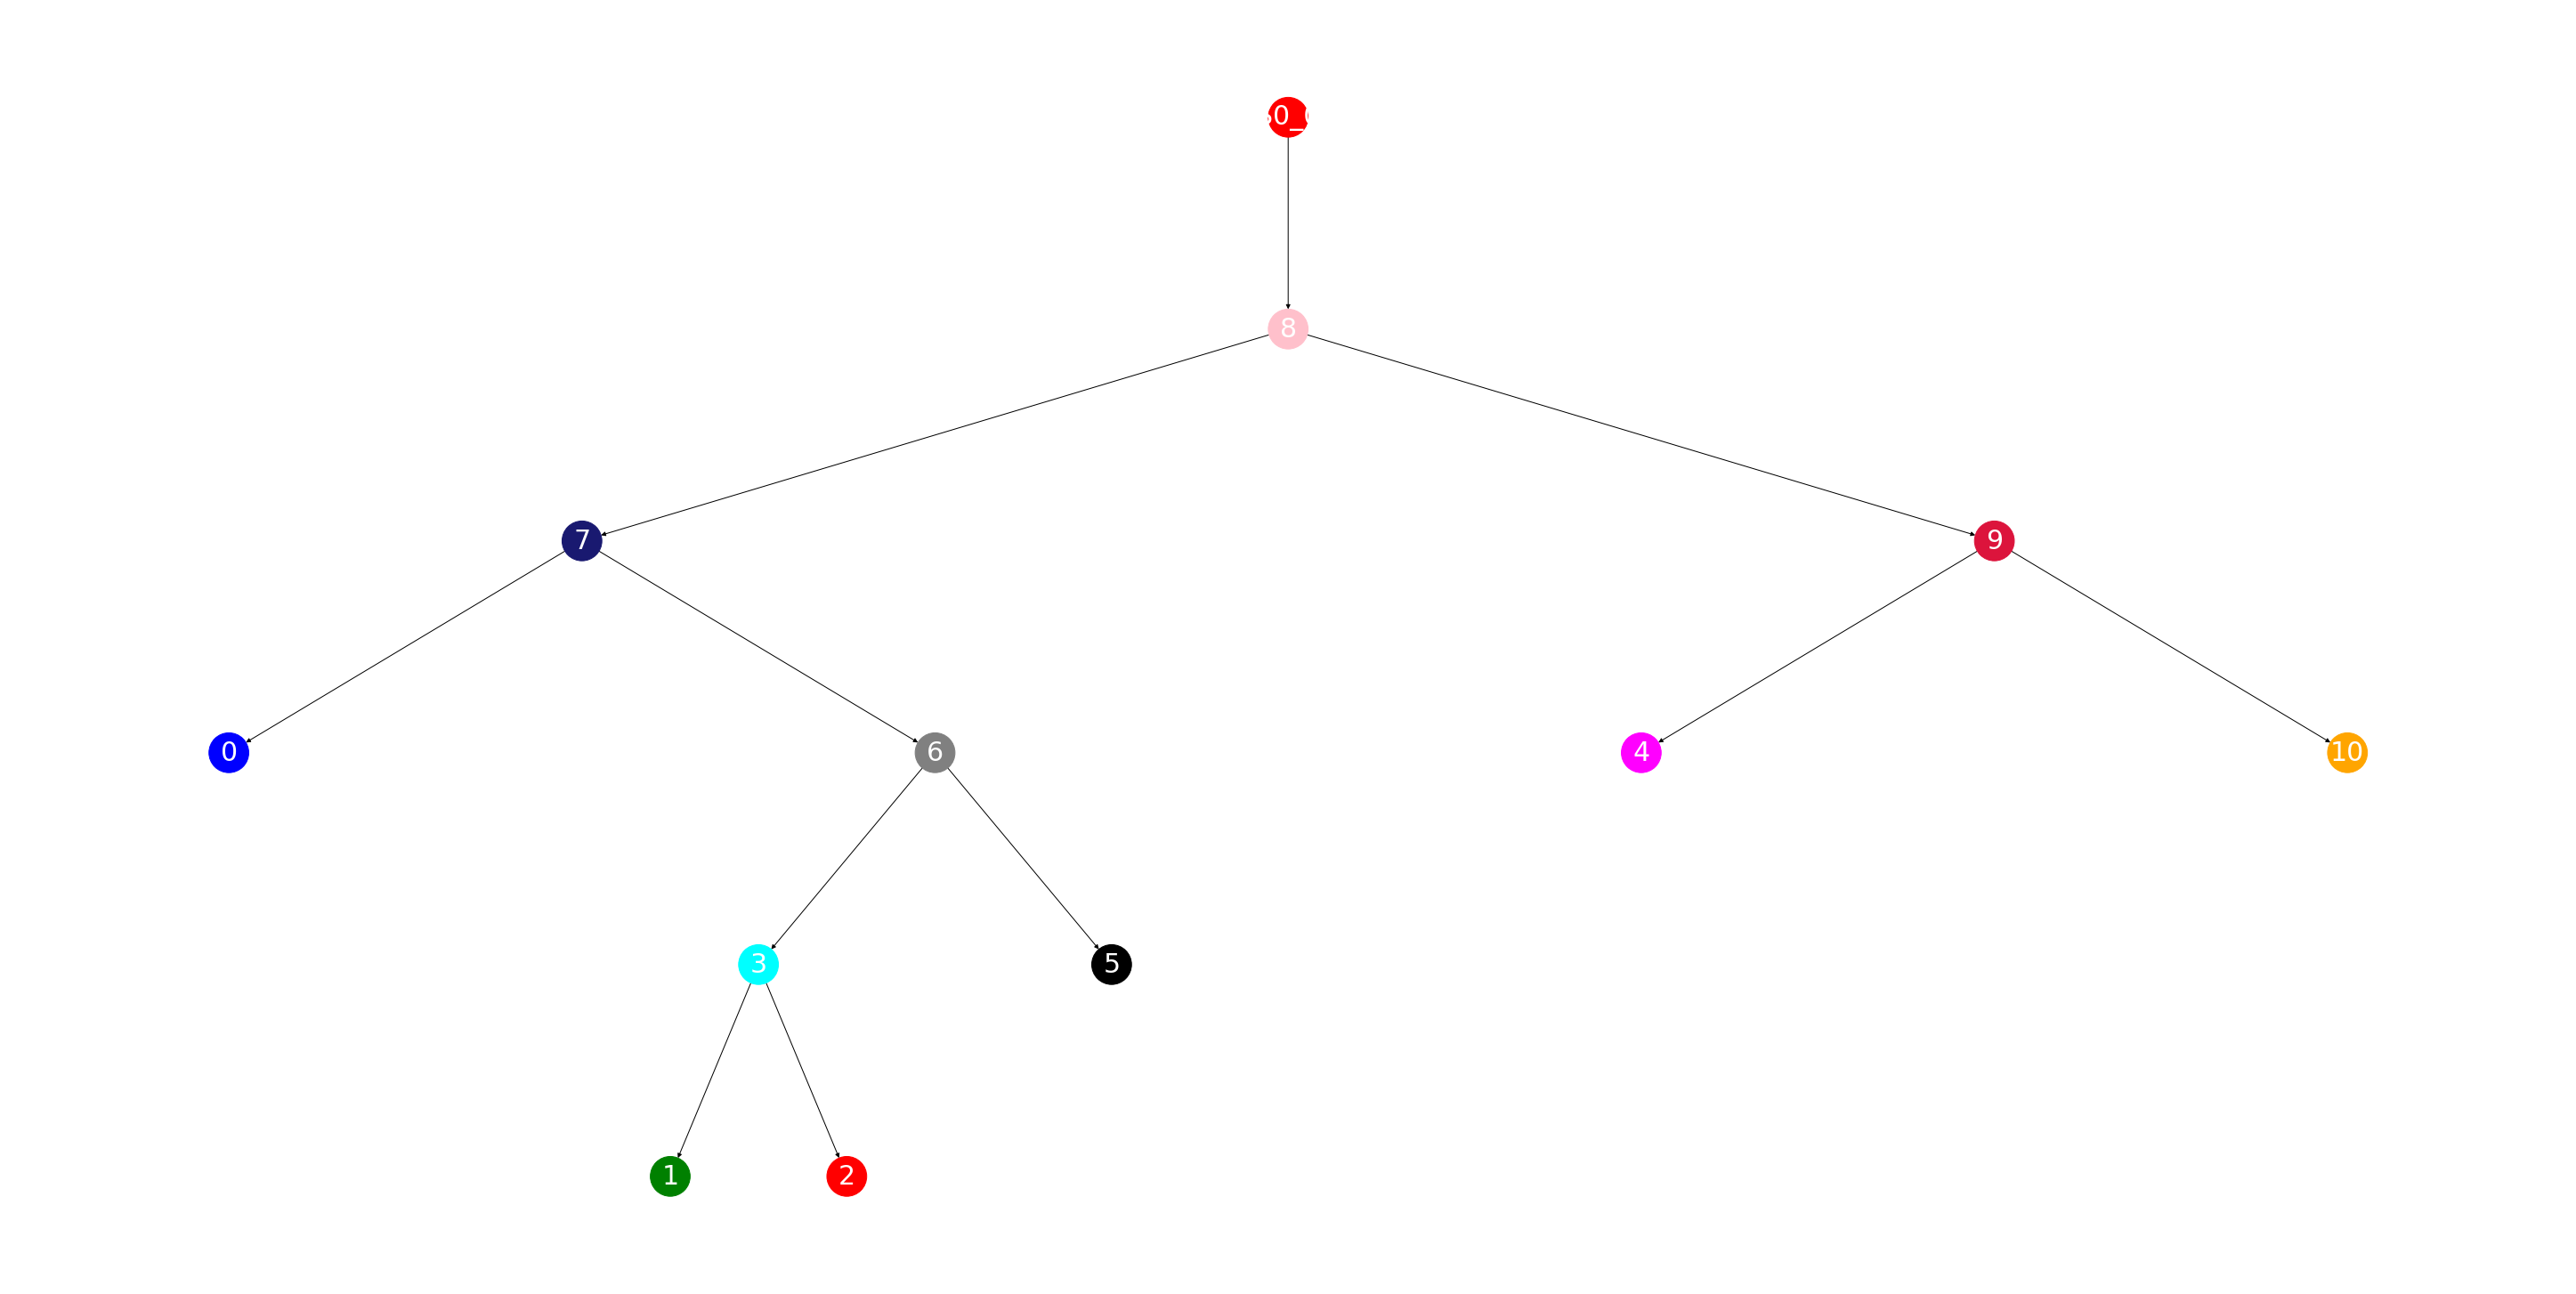

In [12]:
nviz.plot_limb_concept_network_2D(neuron_obj,
                                 node_colors=branch_col)

In [ ]:
branch_obj = neuron_obj[3][0]
nviz.plot_objects(branch_obj.mesh,
                  meshes=

In [15]:
branch_obj = neuron_obj[3][0]
plot_branches_with_spines([neuron_obj[3][0],neuron_obj[3][1]])

# Debugging why some spines are missed

In [18]:
clusters_threshold=3
smoothness_threshold=0.1
shaft_threshold=300
mesh = branch_obj.mesh

In [19]:
import spine_utils as spu

In [21]:
spines_output = spu.get_spine_meshes_unfiltered_from_mesh(mesh,
                                         segment_name="example",
                                         clusters=clusters_threshold,
                                         smoothness=smoothness_threshold,
                                         return_sdf=False,
                                         delete_temp_file=True,
                                         print_flag=True,
                                         shaft_threshold=shaft_threshold)

segment_name before cgal = example
Counter of data = Counter({190.0: 11798, 168.0: 1899, 166.0: 1156, 185.0: 1145, 182.0: 983, 73.0: 461, 189.0: 460, 61.0: 377, 157.0: 351, 129.0: 304, 12.0: 244, 173.0: 233, 174.0: 233, 180.0: 229, 179.0: 217, 172.0: 199, 158.0: 196, 140.0: 193, 89.0: 189, 169.0: 174, 2.0: 165, 154.0: 164, 134.0: 163, 121.0: 161, 141.0: 159, 163.0: 159, 170.0: 159, 27.0: 158, 149.0: 156, 192.0: 155, 68.0: 155, 74.0: 150, 117.0: 149, 29.0: 142, 19.0: 138, 133.0: 135, 191.0: 135, 165.0: 134, 184.0: 133, 175.0: 133, 50.0: 132, 17.0: 131, 122.0: 122, 143.0: 119, 139.0: 117, 0.0: 116, 142.0: 116, 188.0: 115, 177.0: 111, 138.0: 109, 77.0: 107, 86.0: 106, 23.0: 105, 167.0: 105, 150.0: 103, 137.0: 102, 71.0: 100, 187.0: 99, 93.0: 97, 164.0: 93, 146.0: 92, 127.0: 92, 123.0: 91, 25.0: 89, 144.0: 88, 58.0: 87, 186.0: 87, 94.0: 85, 84.0: 85, 105.0: 83, 99.0: 83, 8.0: 83, 109.0: 83, 11.0: 82, 111.0: 82, 30.0: 81, 64.0: 81, 10.0: 80, 147.0: 80, 16.0: 79, 160.0: 77, 171.0: 75, 28.0: 




Total Number of Spines Found = 111


In [22]:
nviz.plot_objects(mesh,
                 meshes=spines_output,
                 meshes_colors="red")

In [27]:
seg_meshes = tu.mesh_segmentation(mesh,
                    clusters=3,
                    smoothness=0.1,
                    return_meshes=True,
                        return_sdf=False)

In [28]:
seg_meshes

[<trimesh.Trimesh(vertices.shape=(6010, 3), faces.shape=(11798, 3))>,
 <trimesh.Trimesh(vertices.shape=(961, 3), faces.shape=(1899, 3))>,
 <trimesh.Trimesh(vertices.shape=(591, 3), faces.shape=(1156, 3))>,
 <trimesh.Trimesh(vertices.shape=(594, 3), faces.shape=(1145, 3))>,
 <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(983, 3))>,
 <trimesh.Trimesh(vertices.shape=(269, 3), faces.shape=(461, 3))>,
 <trimesh.Trimesh(vertices.shape=(241, 3), faces.shape=(460, 3))>,
 <trimesh.Trimesh(vertices.shape=(186, 3), faces.shape=(377, 3))>,
 <trimesh.Trimesh(vertices.shape=(181, 3), faces.shape=(351, 3))>,
 <trimesh.Trimesh(vertices.shape=(159, 3), faces.shape=(304, 3))>,
 <trimesh.Trimesh(vertices.shape=(125, 3), faces.shape=(244, 3))>,
 <trimesh.Trimesh(vertices.shape=(119, 3), faces.shape=(233, 3))>,
 <trimesh.Trimesh(vertices.shape=(120, 3), faces.shape=(233, 3))>,
 <trimesh.Trimesh(vertices.shape=(118, 3), faces.shape=(229, 3))>,
 <trimesh.Trimesh(vertices.shape=(111, 3), faces.shape=(

In [29]:
nviz.plot_objects(meshes=seg_meshes,
                 meshes_colors="random")

In [32]:
spines_output_filtered = spu.filter_spine_meshes(spines_output)

nviz.plot_objects(mesh,
                 meshes=spines_output_filtered,
                 meshes_colors="red")

In [31]:
plot_branches_with_spines([neuron_obj[3][0]])

In [47]:
import neuron
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


In [61]:
neuron_obj.calculate_spines(limb_branch_dict={"L3":[0]},
                        filter_out_border_spines=False,
                       skeleton_endpoint_nullification=True,
                        soma_vertex_nullification=True,
                            
                           print_flag=False)

query = median_mesh_center > 115 and n_faces_branch>100
smoothness_threshold = 0.1
The median_mesh_center was requested and HAS already been calculated
functions_list = [<function median_mesh_center at 0x7fa453786f28>, <function n_faces_branch at 0x7fa453786ae8>]
segment_name before cgal = L3_0


In [62]:
nviz.plot_branch_spines(neuron_obj[3][0],
                       )

In [43]:
list(limb_branch_dict.keys())

[3]